<br>
<div align="center"><font size=2> eScience course 2022</font></div>
<br>
<br>
<div align="center"><font size=10><b>Effects of increasing precipitation on aerosol concentration in the Arctic</b></font></div>
<div align="center"><font size=6>Ingrid Lundhaug</font></div>
<div align="center"><font size=4>ingrblu@uio.no</font></div>
<div align="center"><font size=3><b>Assistant: Theodore Khadir</b></font></div>
<br>
<div align="center"><font size=3>02.12.22</font></div>
<br>
<br>
<br>
<br>




## Abstract 

<font size="3.5"> Increased Artic precipitation is expected with global warming. This will affect the aresol concentration, but how the concentration changes is uncertain. In this study, the influence of increased precipitation in a warmer climate on aerosol concentration is investigated, both spatially and sesonally. This study uses a CMIP6 model, NorESM, to compare precipitation and Cloud Condensation Nuclei (CCN) concentration in an abrupt quadrupling of the atmospheric concentration of carbon dioxide (abrupt 4xCO$_2$) experiment to the Pre-Industrial Control (piControl). A lack of CCN particles is indicated in areas over the sea where precipitation is enhanced. Over land, the relation between precipitation and CCNs is not as pronounced. Seasonal variations also indicate less increase in CCN concentration in months where precipitation is enhanced. The seasonal variations inn CCN concentration can also be explained by variation in solar insolation. </font>   
    


## Table of Contents

1. [<font size="3.5">Introduction</font> ](#intro)
1. [<font size="3.5">Methods</font> ](#methods)
    1. [<font size="3.5">Packages</font> ](#packages)
    1. [<font size="3.5">Datasets</font> ](#dataset)
    1. [<font size="3.5">Analysis methods</font> ](#methodology)
1. [<font size="3.5">Results and discussion</font> ](#results)
1. [<font size="3.5">Conclusion</font> ](#conclusion)
1. [<font size="3.5">Outlook</font> ](#outlook)
1. [<font size="3.5">References</font> ](#references)
1. [<font size="3.5">Acknowledgments</font> ](#Acknowledgments)


## 1. Introduction <a name="intro"></a>

<font size="3.5">The warming of the Artic is occurring at a much higher rate than in the rest of the world - a phenomenon known as Artic amplification (Previdi et al., 2021). With increasing temperatures, the atmosphere can hold more moisture, and thus an increase in precipitation is expected. In addition, the massive sea ice retreat increases surface evaporation, which makes Artic precipitation much more pronounced than it would be only due to the Arctic warming (Bintanja et al., 2020).</font>  

<font size="3.5">Droplets and ice crystals in clouds together with precipitation can alter the aerosol particle concentration, by acting as sources and sinks. Wet scavenging is one of the most important sink of aerosol particles in the atmosphere. Particles that are activated to cloud droplets or crystals can grow large enough under the right conditions to fall out of the cloud as precipitation. The particles are then scavenged by in-cloud scavenging, which is a major removal process for the accumulation mode. Aerosol particles can also be scavenged from beneath the cloud (below-cloud scavenging). This occurs when the cloud above is precipitating, and particles get collected and removed by the falling droplets. Below-cloud scavenging is an important sink for particles in the nucleation mode and coarser particles. (Isokääntä, 2022)</font>

<font size="3.5"> When removing the accumulation mode by precipitation, the nucleation mode is more likely to grow (Maso et al., 2002). Hence clouds and precipitation can also act as a source for new particles. The total change in aerosol concentration by precipitation is unclear and needs to be further investigated.</font> 


<font size="3.5">Aerosols have a crucial impact on the earth's energy budget. Aerosols alter the energy budget directly by scattering and absorbing solar and infrared radiation. In addition, aerosols also have an indirect effect where they can work as cloud condensation nuclei (CCN), thus altering the clouds properties such as lifetime and albedo. With an increased amount of CCNs, the particles grow to be smaller which increases the lifetime and albedo of the cloud. Hence inducing a negative effect on the radiative balance.</font> 

<font size="3.5">Further knowledge of how a warmer Arctic climate with increasing precipitation affects the aerosol concentration is thus essential to get a better understanding of their magnitude in the energy budget. This study will analyze the difference in precipitation and CCN concentrations in a warmer climate compared to the control run in a CMIP6 model. The aim is then to address possible effects of precipitation on aerosol concentrations.</font> 

## 2. Methods <a name="methods"></a>

### 2.A. Packages <a name="packages"></a>



In [1]:
# Importing packages
import os as os

# for handling the data
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import pandas as pd
import dask
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# for plotting 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy as cy
import matplotlib.gridspec as gridspec
%matplotlib inline

# my functions
from functions_Ingrid import *
%reload_ext autoreload
%autoreload 2

# ignoring warnings 
import warnings
warnings.filterwarnings('ignore')


## 2.B. Datasets <a name="datasets"></a>

<font size="3.5"><b>Model, experiments, and variables</b></font> 
<br>
<font size="3.5">I used a coupled Earth System Model from CMIP6; The Norwegian Earth System Model version 2 (NorESM2) which is developed by the NorESM Climate modeling Consortium (NCC) (NorESM, 2020). There are three versions of NorESM2 with different resolutions where NorESM2-MM with 1-degree resolutions is used in this project. To understand how precipitation in a warmer climate affects aerosol concentration I chose the experiments abrupt 4xCO2 and the piControl, to compare the variables without interruptions by future emissions. Hence the changes in aerosol concentration that are caused indirectly due to the increasing temperature can be investigated. The variables I focused on are Precipitation ('pr'), Cloud Condensation Nuclei Concentration at Liquid Cloud Top ('ccn'), and Surface Temperature ('ts').</font> 

<font size="3.5"><b>Reading the data</b></font> 
<br>
<font size="3.5">Since aerosols variables were not available in the Pangeo CMIP6 online catalog, I downloaded the data directly from the Earth System Grid Federation (ESGF) with the software package Wget for the 30 first years (10 years at the time), for both experiments. An example of how that was done is shown below. The time period was selected so that the abrupt 4xCO2 experiment could reach a steady state after the quadrupling.</font> 



In [2]:
'''
urls = ['http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/pr/gn/v20191108/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/ts/gn/v20191108/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/ccn/gn/v20191108/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc'] 


# wget all files in the list
for url in urls:
    os.system('wget ' + url)
'''

"\nurls = ['http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/pr/gn/v20191108/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', \n 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/ts/gn/v20191108/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', \n 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/ccn/gn/v20191108/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc'] \n\n\n# wget all files in the list\nfor url in urls:\n    os.system('wget ' + url)\n"

<font size="3.5">After downloading the data, the files were read in with the python module, Xarray. Since the data was for 10 years at the time, the datasets for each 10-year period was concatenated together.</font>   

#### Reading files from piControl for the first 30 years:

In [3]:
# Reading in multiple piControl files for the 10 first years:

list_of_files10_piControl = [
    '../../Data/ccn_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/co2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/pr_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/prc_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/ts_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/so2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc'
]

ds_piControl10 = xr.open_mfdataset(list_of_files10_piControl, combine='by_coords', compat='override', use_cftime=True)


In [4]:
# Reading in piControl data for the next 20 years, where the files contains all variables that was read in for the 10 first years

ds_piControl20 = xr.open_mfdataset('../../Data/NorESM2-MM_piControl_r1i1p1f1_gn_121001-121912.nc', use_cftime=True)
ds_piControl30 = xr.open_mfdataset('../../Data/NorESM2-MM_piControl_r1i1p1f1_gn_122001-122912.nc', use_cftime=True)

#### Reading files from 4xco2 experiment for the first 30 years:

In [5]:
# 10 first years

ds_4xco2_10 = xr.open_mfdataset('../../Data/all_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_000101-001012.nc', use_cftime=True)

In [6]:
# next 10 years

list_of_files20 = [
    '../../Data/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/prc_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc']

ds_4xco2_20 = xr.open_mfdataset(list_of_files20, combine='by_coords', compat='override', use_cftime=True)


In [7]:
# last 10 years

list_of_files30 = [
    '../../Data/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/prc_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc']

ds_4xco2_30 = xr.open_mfdataset(list_of_files30, combine='by_coords', compat='override', use_cftime=True)

#### Making the datasets for each time period to have equal coordinates, and longitude range before concatenating:

#### For piControl

In [8]:
# dropping variables that dosn't exsist in all time periods 

variables = ["time_bnds", "lev_bnds", "p0", "a", "b", "ps", "a_bnds", "b_bnds", "lat_bnds", "lon_bnds"]
ds_piControl10 = ds_piControl10.drop_vars(variables)

variables = ["dms", "emidms"]
ds_piControl20 = ds_piControl20.drop_vars(variables)
ds_piControl30 = ds_piControl30.drop_vars(variables)

In [9]:
# transforming longitude range for the 10 first years

ds_piControl10 = ds_piControl10.assign_coords(lon=(((ds_piControl10.lon + 180) % 360) - 180)).sortby('lon')

#### For abrubt 4xCO2

In [10]:
# the time periods for datasets with different dimension
time20 = ds_4xco2_20.time.values
time30 = ds_4xco2_30.time.values

In [11]:
# converterting datatset for second timeperiod to have the same lat, lon and lev points as first period
ds_20 = convert(ds_4xco2_20, list_of_files20, time20)

../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc
../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc
../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc


In [12]:
# converterting datatset for third timeperiod to have the same lat, lon and lev points as first period
ds_30 = convert(ds_4xco2_30, list_of_files30, time30)

../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc
../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc
../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc


#### Concatenating the datasets for the three time periods for each experiment:

In [13]:
# the variables the dataset should contain
var_list = ['pr', 'ccn', 'cdnc', 'co2', 'emibc', 'emibvoc', 'emidust', 'emiisop', 'emioa', 'emiso2', 'emiso4', 'emiss', 'emivoc', 'prc', 'so2', 'ts']

In [14]:
# concatinating for abrubt 4xCO2
ds_all_4xco2 = xr.concat([ds_4xco2_10[var_list], ds_20[var_list], ds_30[var_list]], dim="time")

In [15]:
# concatinating for piControl
ds_all_piControl = xr.concat([ds_piControl10[var_list], ds_piControl20[var_list], ds_piControl30[var_list]], dim='time')

Fixing variable units:

In [16]:
ds_4xco2_NorESM = fix_units(ds_all_4xco2)
ds_piControl_NorESM = fix_units(ds_all_piControl)

### 2.C. Analysis methods <a name="methodology"></a>

In [17]:
# yearly data
ds_4xco2_NorESM_y = annual(ds_4xco2_NorESM)
ds_piControl_NorESM_y = annual(ds_piControl_NorESM)

#### Calculations for time series plots - Global and Arctic mean

In [18]:
# defining the Arctic area 
max_lat = 90; min_lat = 70; max_lon = 180; min_lon = -180

# finding all lat and lon within the area
mask_lon = (ds_4xco2_NorESM_y.lon >= min_lon) & (ds_4xco2_NorESM_y.lon <= max_lon)
mask_lat = (ds_4xco2_NorESM_y.lat >= min_lat) & (ds_4xco2_NorESM_y.lat<= max_lat)

# delimit the datatsets to only where the lat and lon are True
ds_arctic_4xco2 = ds_4xco2_NorESM_y.where(mask_lon & mask_lat, drop=True)
ds_arctic_piControl = ds_piControl_NorESM_y.where(mask_lon & mask_lat, drop=True)

In [19]:
# Artic and global mean

arctic_mean_4xco2 = weighted_mean(ds_arctic_4xco2)
global_mean_4xco2 = weighted_mean(ds_4xco2_NorESM_y)

arctic_mean_piControl = weighted_mean(ds_arctic_piControl)
global_mean_piControl = weighted_mean(ds_piControl_NorESM_y)

#### Calculations for spatial plots - difference between abrupt 4xCO2 and piControl

In [20]:
# skipping the 5 first years compare thexperiments after the quardrupling of CO2 is stabalized 

ds_4xco2_stable = ds_4xco2_NorESM_y.sel(time=slice('0005-12-31','0030-12-31'))
ds_piControl_stable = ds_piControl_NorESM_y.sel(time=slice('1204-12-31','1229-12-31'))

ds_4xco2_stable = add_attrs(ds_4xco2_stable)
ds_piControl_stable = add_attrs(ds_piControl_stable)

In [21]:
# computing the mean over time 
ds_4xco2_mean = ds_4xco2_stable.mean('time', keep_attrs=True)
ds_piControl_mean = ds_piControl_stable.mean('time', keep_attrs=True)

In [22]:
# global differences
ds_diff = ds_4xco2_mean-ds_piControl_mean

#### Seasonal differences

In [23]:
# grouping the datasets into seasons
ds_season_4xco2 = ds_4xco2_NorESM.groupby('time.season').mean(keep_attrs=True)
ds_season_piControl = ds_piControl_NorESM.groupby('time.season').mean(keep_attrs=True)

In [24]:
# gloabal seasonal differences
season_diff = ds_season_4xco2-ds_season_piControl

In [25]:
# name of seasons
seasons = season_diff.season.values

## 3. Results and discussion <a name="results"></a>

<font size="3.5">Figure 1 shows that temperature, precipitation, and CCN concentrations will increase more over the Arctic than for the global mean.</font>  

<font size="3.5">The spatial plots in Figures 3, and 4, show that the most pronounced increase in precipitation occurs on the south coast of Greenland, as well as over the Bering Sea. If we look at the CCN concentration in Figure 4 for the same locations, we see that the concentration is only increasing slightly. Bearing in mind from figure 1 that Arctic CCN concentration will have a large increase in total, the slight increase in CCNs over the two locations could induce that wet scavenging is a dominating process.</font>   

<font size="3.5">On the other hand, CCN concentrations are also only slightly increasing over Scandinavia and western parts of Russia, where precipitation is not pronouncedly increased. In addition, the CCNs is conspicuously decreasing over eastern parts of Russia. The precipitation map shows that there is an increase in precipitation, but not as concentrated in the same locations as the CCN drop. The precipitation is also not increasing as pronouncedly as for the coast of Greenland, and the Bering Sea. One difference between these two scenarios is that the first case is located over the ocean, and the second case is located over the continents. Over the oceans, there is more access to moisture from the sea, while this is not necessarily the case over land. Thus other processes can induce the small increase in CCNs over land, while wet scavenging over the two ocean areas can still be a part of the removal of CCNs in these regions.</font>  

<font size="3.5">The changes in CCN concentrations strongly vary over the year as Figure 7 shows. The summer months are characterized by high concentrations of CCNs, while winter and spring have the lowest CCN concentrations. Compared with the seasonal precipitation plots in Figure 6, we see that precipitation is at its lowest in the summer months and highest in winter and spring. Hence when there is less precipitation, there would be less wet scavaging, and we see more CCN concentration. However multiple factors affect the seasonal differences in CCN concentration. In summer there is more solar radiation compared to the winter, especially in the Arctic. Higher solar radiation produces higher chemical activity, and thus also the formation of new aerosol particles. The lack of solar radiation in the spring and winter also reduces the ability for new aerosol particles to form.</font> 


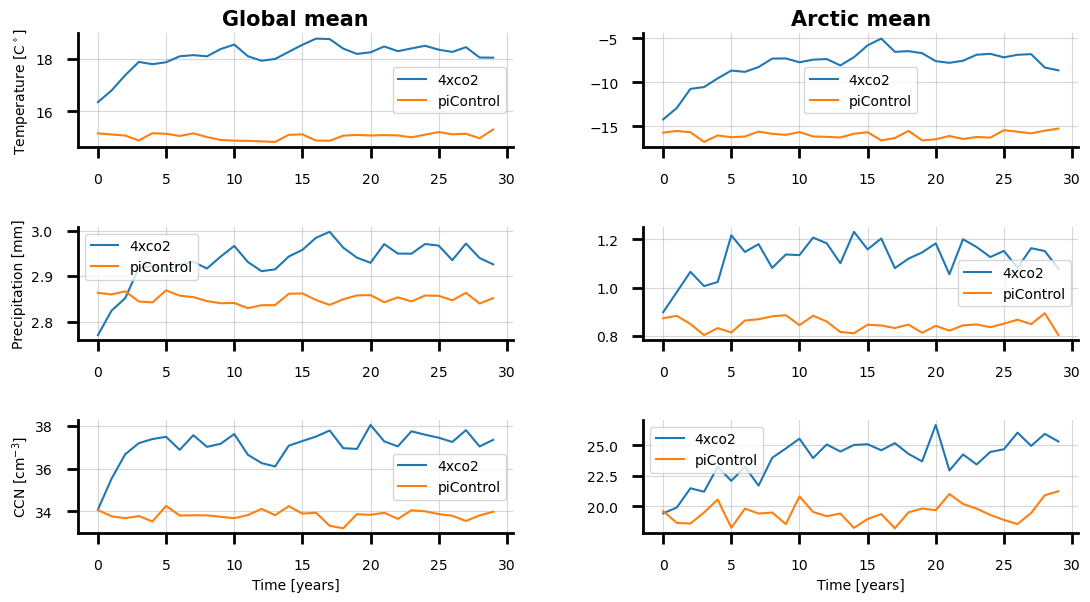

In [26]:
# Plotting time series

timepoints = []

for i in range(len(global_mean_4xco2['time'])):
    timepoints.append(i)
    

fig = plt.figure(figsize=(10, 5))

gs = gridspec.GridSpec(ncols=2, nrows=3, hspace = 0.7, wspace = 0.3, top = 1,
                       bottom = 0, left = 0, right = 1)


ax = fig.add_subplot(gs[0, 0])
ax.plot(timepoints, global_mean_4xco2['ts'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['ts'], label='piControl')
ax.set_title('Global mean', fontweight='bold', size=15)
ax.set_ylabel('Temperature [C$^\circ$]')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[1, 0])
ax.plot(timepoints, global_mean_4xco2['pr'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['pr'], label='piControl')
ax.set_ylabel('Precipitation [mm]')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[2, 0])
ax.plot(timepoints, global_mean_4xco2['ccn'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['ccn'], label='piControl')
ax.set_xlabel('Time [years]')
ax.set_ylabel('CCN [cm$^{-3}$]')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[0, 1])
ax.plot(timepoints, arctic_mean_4xco2['ts'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['ts'], label='piControl')
ax.set_title('Arctic mean', fontweight='bold',  size=15)
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[1, 1])
ax.plot(timepoints, arctic_mean_4xco2['pr'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['pr'], label='piControl')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[2, 1])
ax.plot(timepoints, arctic_mean_4xco2['ccn'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['ccn'], label='piControl')
ax.set_xlabel('Time [years]')
#ax.set_yscale('log')
ax.legend()
fancy(ax, 10)
    


<font size="3.5">Figure 1: time-series plots of how temperature, precipitation, and CCN concentration varies the 30 first year after the start of runtime, for both experiments.</font>  

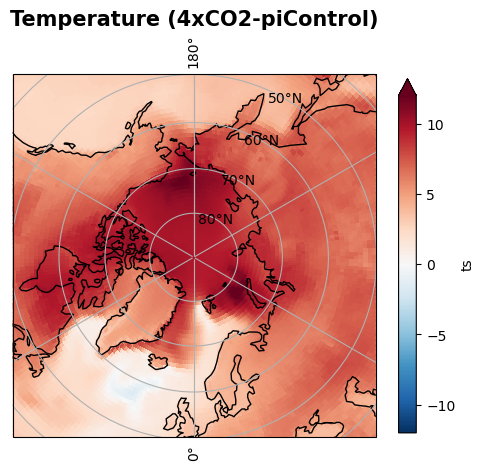

In [27]:
# plotting differences in temp, precipitation, and CCN concentration on a map

plot_map(ds_diff['ts'], 'Temperature (4xCO2-piControl)', reverse=True, vmin=-12, vmax=12)

<font size="3.5">Figure 2: Spatial plot for tempereature changes for the abrupt 4xCO2-piControl experiment over the Artic area. Units are given in C$^\circ$.</font> 

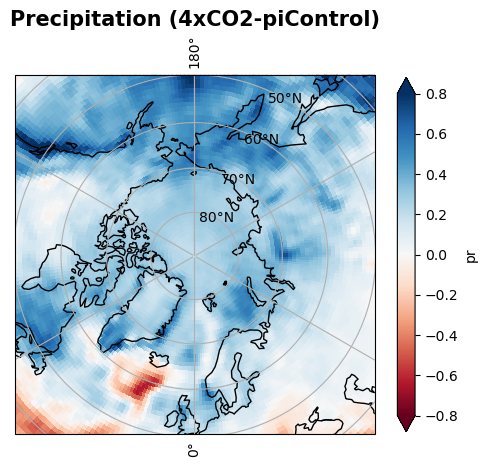

In [28]:
plot_map(ds_diff['pr'], 'Precipitation (4xCO2-piControl)', vmin=-0.8, vmax=0.8)

<font size="3.5">Figure 3: Sptial plot for precipitation changes for the abrupt 4xCO2-piControl experiment over the Artic area. Units are given in $mm/day$.</font> 

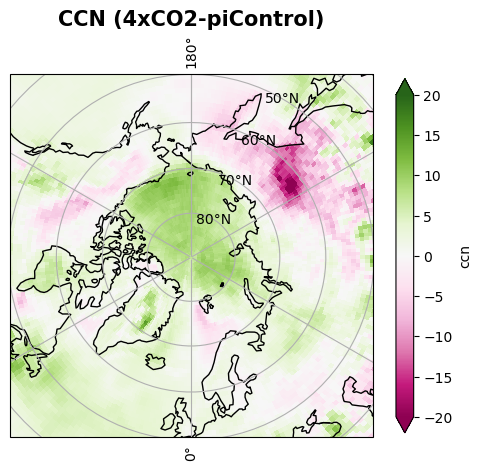

In [29]:
plot_map(ds_diff['ccn'], 'CCN (4xCO2-piControl)', cmap='PiYG',  vmin=-20, vmax=20)

<font size="3.5">Figure 4: Spatial plot for changes in ccn concentration for the abrupt 4xCO2-piControl experiment over the Artic area. Units are given in $cm^{-3}$.</font> 

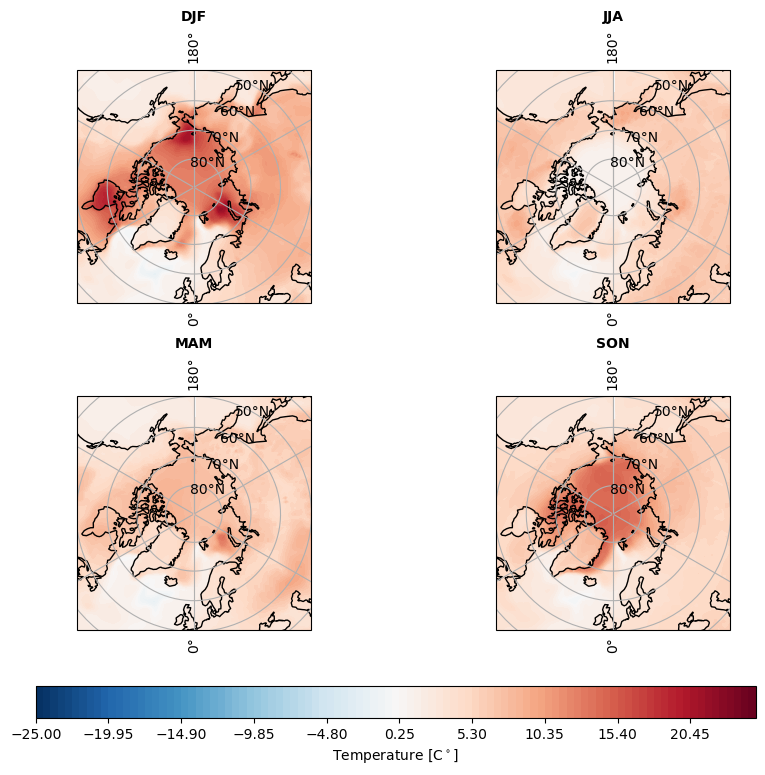

In [30]:
plot_seasons_map(season_diff, 'ts', seasons, 'Temperature [C$^\circ$]', np.linspace(-25,25,100), cmap='RdBu_r')

<font size="3.5">Figure 5: Seasonal plot for changes in temperature.</font> 

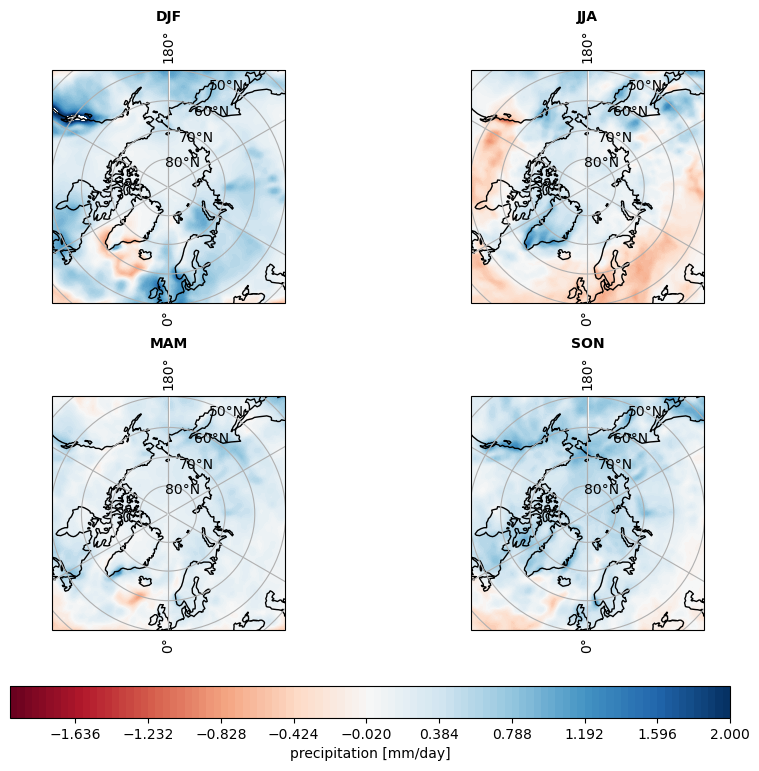

In [31]:
plot_seasons_map(season_diff, 'pr', seasons, 'precipitation [mm/day]', np.linspace(-2,2,100))

<font size="3.5">Figure 6: Seasonal plot for changes in precipitation.</font> 

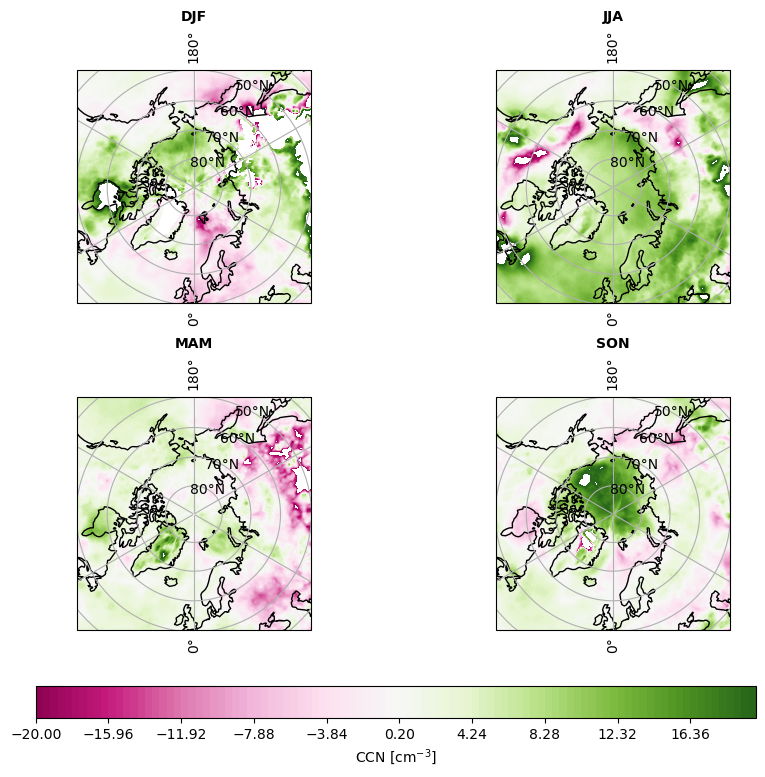

In [32]:
plot_seasons_map(season_diff, 'ccn', seasons, 'CCN [cm$^{-3}$]', np.linspace(-20,20,100), cmap='PiYG')

<font size="3.5">Figure 7: Seasonal plot for changes in CCN concentrations.</font> 

## 4. Conclusion <a name="conclusion"></a>

<font size="3.5">The increasing precipitation in a warmer climate is shown to have a possible influence on aerosol concentration. The south coast of Greenland and The Bering sea shows a less increase in CCN concentration when precipitation is enhanced, indicating a dominating wet scavenging process. Scandinavia and the west of Russia do not show the same correlation. Hence, there is not a significant pattern of how increasing precipitation affects aerosol concentration. The seasonal differences show that seasons with a low concentration of CCN have pronounced precipitation, and the other way around. This can amplify that wet scavenging is a domination process. However, multiple factors play an important role in the variations in aerosol concentration. Large seasonal variations in solar insolation are known to affect seasonal variations in CCN concentration. This is also well represented in the seasonal plot for CCN concentration. Multiple factors, such as solar radiation, are needed to be accounted for to completely understand the influence of precipitation on aerosol concentration.</font>  
    
 

## 5. References <a name="references"></a>

<font size="3.5">Bintanja, R., Van Der Wiel, K., Van Der Linden, E.C., Reusen, J., Bogerd, L., Krikken, F., Selten, F.M.: Strong future increases in Arctic precipitation variability linked to poleward moisture transport, (2020), SCIENCE ADVANCES, Vol 6, Issue 7, DOI: 10.1126/sciadv.aax68</font>  

<font size="3.5">Isokääntä, S., Kim, P., Mikkonen, S., Kühn, T., Kokkola, H., Yli-Juuti, T., Heikkinen, L., Luoma, K., Petäjä, T., Kipling, Z., Partridge, D., Virtanen, A.: The effect of clouds and precipitation on the aerosol concentrations and composition in a boreal forest environment, (2022), Atmos. Chem. Phys., 22, 11823–11843, DOI: https://doi.org/10.5194/acp-22-11823-2022</font> 

<font size="3.5">Previdi, M., Smith, K.L., Lorenzo, P.M.: Arctic amplification of climate change: a review of underlying mechanism, (2021), Environ. Res. Lett. 16 093003, DOI: 10.1088/1748-9326/ac1c29</font> 

<font size="3.5">Maso, D.M., Kulmala, M., Lehtinen, K.E.J., Mäkelä, P.,  Aalto, P., O'Dowd, O.D.: Condensation and coagulation sinks and formation of nucleation mode particles in coastal and boreal forest boundary layers, (2002), AGU Jornal, Vol 7, Issue D19, DOI: https://doi.org/10.1029/2001JD001053</font> 

<font size="3.5">NorESM (2020) *Introduction NorESM2 User’s Guide.* Available at: https://noresm-docs.readthedocs.io/en/latest/start.html (Accessed: 25.11.22)</font> 

## 6. Acknowledgments <a name="Acknowledgments"></a>

<font size="3.5">I would like to express a great thanks to my group members Arttu and Zhangcheng for their great support, and for always being available for any questions. I would also like to thank our group assistant, Theodore, for his great help with coding, and for helping me download data from esgf.</font> 

<font size="3.5">Otherwise, I would like to thank my fellow students for making the excursion extra enjoyable, and to thank Paul and Michael for organizing the eScience course.</font>  